# Linear Regression

In the previous notebook, we represented the parametrization of a linear model. In this section we are going to introduce  the linear regression model.  
We will use a dataset that contains measurements taken on penguins. We will formulate  the following problem: using the flipper length of a penguin, we would like to infer its mass.

In [6]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('data/penguins_regression.csv')
df.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


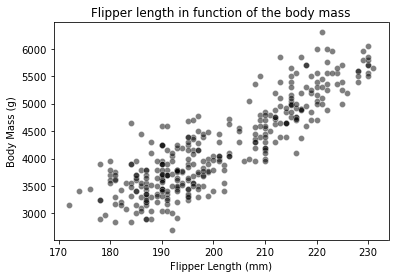

In [9]:
ax = sns.scatterplot(data=df, x="Flipper Length (mm)", y="Body Mass (g)",
                     color="black", alpha=0.5)
ax.set_title("Flipper length in function of the body mass");

In this problem, penguin mass is our target. It is a continuous variable that roughly varies between 2700 g and 6300 g. Thus, this is a regression problem (in contrast to classification). We also see that there is almost a linear relationship between the body mass of the penguin and its flipper length. The longer the flipper, the heavier the penguin.

In [10]:
data, target = df[['Flipper Length (mm)']], df['Body Mass (g)']

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linear_regression = LinearRegression()
linear_regression.fit(data, target)

LinearRegression()

The instance `linear_regression` will store the parameter values in the attributes `coef_` and `intercept_`. We can check what the optimal model found is:

In [13]:
weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

49.68556640610011

In [15]:
intercept_body_mass = linear_regression.intercept_
intercept_body_mass

-5780.831358077066

We will use the weight and intercept to plot the model found using seaborn:

In [16]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass)

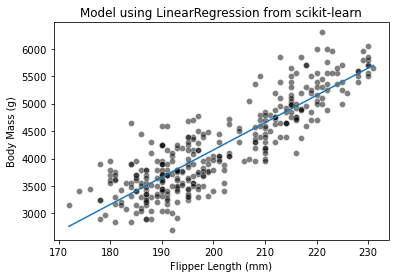

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data['Flipper Length (mm)'], y=target, color="black", alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
_ = plt.title("Model using LinearRegression from scikit-learn")

Two metrics to compute the goodness of fit of a model: the mean squared error and the mean absolute error:

In [19]:
from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target, inferred_body_mass)
print(f"The mean squared error of the optimal model is {model_error:,.2f}")

The mean squared error of the optimal model is 154,546.19


A linear regression model minimizes the mean squared error on the training set. This means that the parameters obtained after the fit are the optimal parameters that minimizes the mean squared error. In other words, any other choice of parameters will yield a model with a higher mean squared error on the training set.

However, the mean squared error is difficult to interpret. The mean absolute error is more intuitive since it provides an error in the same unit as the target.

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
model_error = mean_absolute_error(target, inferred_body_mass)
print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

The mean absolute error of the optimal model is 313.00 g


A mean absolute error of 313 means that in average, our model make an error of +/- 313 grams when predicting the body mass of a penguin given its flipper length.